# TGLC example notebook 

#### In this notebook, we will load the TGLC dataset and plot an example lightcurve.

In [72]:
from datasets import load_dataset
from datasets.data_files import DataFilesPatternsDict
import matplotlib.pyplot as plt 
import numpy as np

In [73]:
fp = "./tglc_data/s0023/MultimodalUniverse/tglc.py"
data_files = DataFilesPatternsDict.from_patterns({"train": ["TGLC/healpix=*/*.hdf5"]})
tglc = load_dataset(fp, data_files = data_files, trust_remote_code=True)
dset = tglc.with_format('numpy')['train']

In [74]:
dset = iter(dset)
example = next(dset)

In [83]:
print(f"The keys of the dataset are: {list(example.keys())}")
print(f"The keys of the lightcurve are: {list(example['lightcurve'].keys())}")

The keys of the dataset are: ['lightcurve', 'RA', 'DEC', 'TIC_ID', 'gaiadr3_id', 'aper_flux_err', 'psf_flux_err']
The keys of the lightcurve are: ['time', 'psf_flux', 'aper_flux', 'tess_flags', 'tglc_flags']


In [81]:
def precision(flux): 
    '''
    Precision estimate from the Han & Brandt paper for TGLC lightcurves (https://arxiv.org/abs/2301.03704)
    Parameters
    ----------
    flux : np.ndarray
        The flux of the lightcurve.
    Returns
    -------
    precision : float
        The precision of the lightcurve.
    ''' 
    return 1.48 * (1/np.sqrt(2)) * np.median(np.abs(np.diff(flux)))

## Plotting a TGLC lightcurve

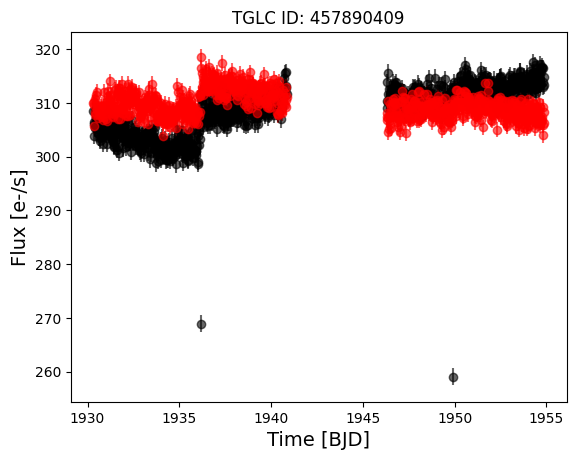

In [82]:
idx = (~np.isnan(example['lightcurve']['aper_flux'])) & (~example['lightcurve']['tglc_flags'].astype(np.bool))
# To-Do: Think about GAIA flags also here..

plt.errorbar(example['lightcurve']['time'][idx], example['lightcurve']['aper_flux'][idx], yerr=precision(example['lightcurve']['aper_flux'][idx]), marker='o', alpha=0.6, ls='none', c='black')

idx = (~np.isnan(example['lightcurve']['psf_flux'])) & (~example['lightcurve']['tglc_flags'].astype(np.bool))
plt.errorbar(example['lightcurve']['time'][idx], example['lightcurve']['psf_flux'][idx], yerr=precision(example['lightcurve']['psf_flux'][idx]), marker='o', alpha=0.6, ls='none', c='red')

plt.xlabel('Time [BJD]', fontsize=14)
plt.ylabel('Flux [e-/s]', fontsize=14)

plt.title(f"TGLC ID: {example['TIC_ID']}")
plt.show()